### Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
sns.color_palette("Paired", as_cmap=True)
sns.set_style("whitegrid")

<br />

### Provinces

In [2]:
provinces = gpd.read_file('vietnam_adm2.json')

In [3]:
provinces.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        64 non-null     object  
 1   name_vi   64 non-null     object  
 2   name_en   64 non-null     object  
 3   type_vi   64 non-null     object  
 4   type_en   64 non-null     object  
 5   geometry  64 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 3.1+ KB


<Axes: >

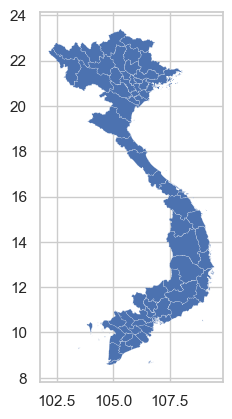

In [46]:
provinces.plot(linewidth=0.1)

In [47]:
provinces

,id,name_vi,name_en,type_vi,type_en,geometry
0,1,Đồng Tháp,Dong Thap,Tỉnh,Province,"POLYGON ((105.49772 10.95407, 105.49846 10.952..."
1,2,An Giang,An Giang,Tỉnh,Province,"POLYGON ((105.18714 10.91106, 105.18714 10.908..."
2,3,Bạc Liêu,Bac Lieu,Tỉnh,Province,"POLYGON ((105.3732 9.59704, 105.37393 9.59556,..."
3,4,Bến Tre,Ben Tre,Tỉnh,Province,"MULTIPOLYGON (((106.63825 9.81951, 106.63752 9..."
4,5,Cần Thơ,Can Tho,Thành phố trực thuộc tỉnh,City|Municipality|Thanh Pho,"POLYGON ((105.49479 10.32524, 105.49626 10.323..."
...,...,...,...,...,...,...
59,60,Đắk Lắk,Dak Lak|Dac Lac,Tỉnh,Province,"POLYGON ((108.68124 12.99777, 108.68124 12.996..."
60,61,Đắk Nông,Dac Nong,Tỉnh,Province,"POLYGON ((108.11281 12.18355, 108.11208 12.183..."
61,62,Gia Lai,Gia Lai,Tỉnh,Province,"POLYGON ((108.54646 14.58912, 108.54719 14.589..."
62,63,Kon Tum,Kon Tum,Tỉnh,Province,"POLYGON ((108.2388 15.03108, 108.23953 15.0310..."


<br />

### Affected Provinces: Quang Ninh, Hai Phong City, Lao Cai

https://www.unocha.org/publications/report/viet-nam/viet-nam-typhoon-yagi-and-floods-situation-update-no-3-14-september-2024

In [18]:
affected_provinces = provinces[['name_en', 'geometry']]

In [19]:
affected_provinces = affected_provinces.loc[affected_provinces['name_en'].isin (['Quang Ninh', 'Hai Phong City|Haiphong', 'Lao Cai'])]
affected_provinces

,name_en,geometry
15,Hai Phong City|Haiphong,"MULTIPOLYGON (((107.74142 20.14773, 107.74142 ..."
29,Lao Cai,"POLYGON ((104.34108 22.70903, 104.34035 22.706..."
31,Quang Ninh,"MULTIPOLYGON (((107.15101 20.738, 107.15101 20..."


<Axes: >

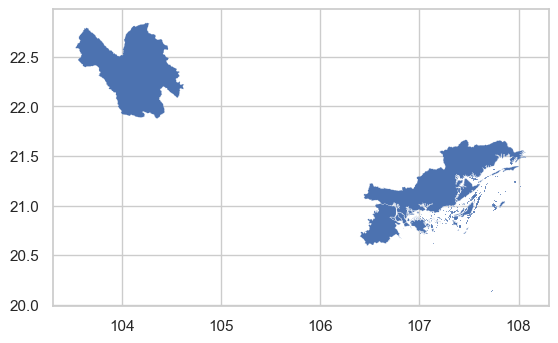

In [61]:
affected_provinces.plot(linewidth=0.1)

<br />

#### Damage

In [22]:
prov_damage = affected_provinces.assign(damage = [40000, 5000, 102000])
prov_damage

,name_en,geometry,damage
15,Hai Phong City|Haiphong,"MULTIPOLYGON (((107.74142 20.14773, 107.74142 ...",40000
29,Lao Cai,"POLYGON ((104.34108 22.70903, 104.34035 22.706...",5000
31,Quang Ninh,"MULTIPOLYGON (((107.15101 20.738, 107.15101 20...",102000


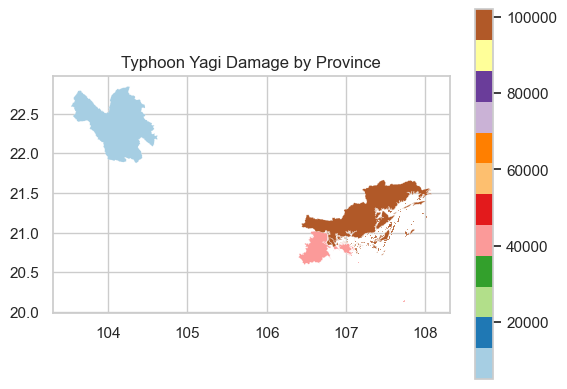

In [59]:
prov_damage.plot(column='damage', legend=True, cmap='Paired', linewidth=0.1)
plt.title("Typhoon Yagi Damage by Province")
plt.savefig('vietnam_yagi.png', bbox_inches='tight')